## Showcase of experiment results

In [5]:
import numpy as np
import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from components.cnn_parallell import make_t_sne, experiment1, experiment2, experiment4, experiment6, experiment7, experiment8
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
plt.rcParams["figure.figsize"] = (4,3)

def eval_clfs_svm(clfs, X_te, y_te, Cs, fake = False, scores = None):
    clf_scores = [clf.score(X_te, y_te) for clf in clfs]
    max_score = np.max(clf_scores)
    y_pred = clfs[np.argmax(clf_scores)].predict(X_te)
    cf_matrix = confusion_matrix(y_te, y_pred)
    _, ax = plt.subplots(1, 2, figsize=(9, 3))
    ax[0].plot([str(t) for t in Cs], clf_scores, linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[0].set_title("Accuracy scores from C values")
    ax[0].set_ylim([.5, 1.])
    ax[1].set_xlabel("Score")
    ax[1].set_ylabel("tol")
    sns.heatmap(cf_matrix, annot=True, fmt="d", ax=ax[1])
    ax[1].set_xlabel("Predicted label")
    ax[1].set_ylabel("True label")
    ax[1].set_title(f"Confusion matrix from estimator\n with highest accuracy score: {max_score}")
    plt.show()

def trainSVMestimate(X_tr, y_tr, Cs):
    clfs = [SVC(kernel='rbf', C=C, gamma="auto") for C in Cs]
    for clf in clfs:
        clf.fit(X_tr, y_tr)
    return clfs

In [4]:
TRAIN_SIZE = 60000

imgs = mnist.train_images()/255.0
labels = mnist.train_labels()
data_train = imgs[0:TRAIN_SIZE, 1:, 1:]
labels_train = labels[0:TRAIN_SIZE]
subset_flattened = data_train.reshape(TRAIN_SIZE, 27*27)

## TSNE results with various center positions

Various representations are experimented with where in each experiment, we change how the representations of mnist images are obtained. Common for all experiments is that all training images in the mnist dataset are multiplied (utilizing dot product) with various filters from a filter bank. We vary the center position where we apply the filter and how many representations are made for each image. Generally, we choose centers for where to apply the image, and form a grid of positions we apply the filters for each center. The representations (scalar values) obtained from the grids and filters are max pooled along four filter positions. 

We utilize TSNE in order to examine how the representations are. The true labels are also plotted with the dimensionality reduction, in order to inspect whether representations from mnist images with the same labels have fairly equal representations. 

The arguments to scikit-learn's TSNE object are consistent among all the experiments:
* n_components: 2
* perplexity: default (30.)
* learning_rate: default (auto) (Default for version 1.2 and above)
* n_iter: default (1000)
* init: pca (Default for version 1.2 and above)
* random_state: 0
* n_jobs: default (1) (Can be changed for faster execution)

### Experiment 1

In the first experiment, we work with a fixed length of 7 units, rotate a vector and draw 6 centers from the origin. For each center we multiply the image with each filter in the filter bank. The filters are placed on a rolled 7x7 grid. The values of the dot products from multiplying the image with each point in the grid relative to the center are max pooled together. We max pool the dot products from all the points in the grid. We obtain four values where each value is obtained from max pooling dot products from all filters resembling four directions. The dot product centers can be seen below. 

<img src="assets/exp1.png" alt="Experiment 1 alt" width="300"/>

In [4]:
ex1manifold = experiment1(data_train)
experiment1_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex1manifold)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


This is done with TRAIN_SIZE (currently 5000) mnist images. We obtain a manifold with size (5000, 4) and plot the result through dimensionality reduction with T-SNE

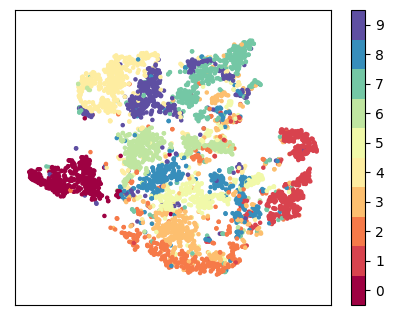

In [5]:
make_t_sne(experiment1_embedding, labels_train, "")

### Experiment 2

We expand the composition of the centers. Instead of a vector length of 7, we decide to go with 8 because this is favourable when calculating with discrete values, as centers need to have discrete coordinates. The approximations are far better, yielding more evenly spaced centers. In addition, we create another "shell" of centers, to obtain more representations of images.

<img src="assets/exp2.png" alt="Experiment 2 alt" width="300"/>

In [4]:
ex2manifold = experiment2(data_train)
experiment2_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex2manifold)

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [ ]:
# 3 minutes 0.2 seconds to runs

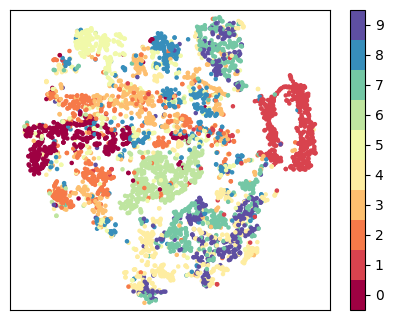

In [5]:
make_t_sne(experiment2_embedding, labels_train, "")

### Experiment 3

Previously, we max-pooled based on four approximate filter directions, all the dot products of the grid from the centers were divided into which filter were applied, where the filters belonged one of the four directions, whichever it resembled the closest (horizontal | , vertical -- , horizontal / and \\). Now we also max pool the grid dot products into filter sizes. We divide the filters into four sizes where the smallest filters were discarded. (Why?)

The same grid as in experiment 2 was used

In [4]:
ex3manifold = experiment3(data_train)
experiment3_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex3manifold)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


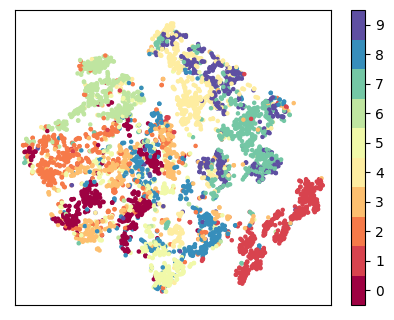

In [5]:
make_t_sne(experiment3_embedding, labels_train, "")

### Experiment 4

We go back to max pooling based on four directions only (excluding filter sizes now), and apply all filters. In addition, we expand the centers, including even more centers. The radius is also variable. We set the radius to 6 in order to contain all the centers within the image. The resulting composition can be seen below.

<img src="assets/exp4.png" alt="Experiment 4 alt" width="300"/>

In [5]:
ex4manifold = experiment4(data_train)
experiment4_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex4manifold)

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


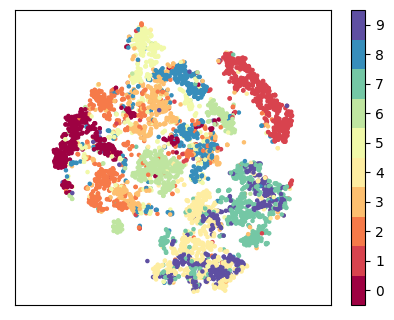

In [6]:
make_t_sne(experiment4_embedding, labels_train, "")

### Experiment 5

We keep the many of the same configurations as in experiment 4, but we tighten the composion by reducing the radius to 4. Similar to experiment 2, but we now have more centers.

<img src="assets/exp5.png" alt="Experiment 5 alt" width="300"/>

In [4]:
ex5manifold = experiment4(data_train, length=4)
experiment5_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex5manifold)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


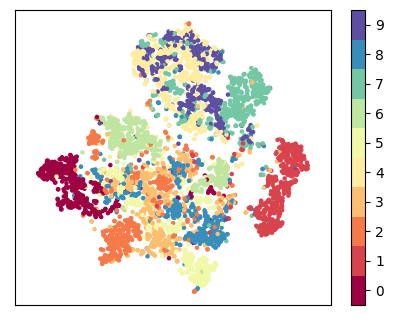

In [5]:
make_t_sne(experiment5_embedding, labels_train, "")

### Experiment 6

Experiment 6 takes the same approach as experiment 4 with the same number of centers. In addition we introduce something called threshholding, where all coefficients from the transformation are put through a threshhold. To start with, we engage with a threshhold of 0.85, where all coefficients below 0.85 are set to 0.

In [6]:
ex6manifold = experiment6(data_train, threshhold=0.85)
experiment6_embedding = TSNE(n_components=2, random_state=0, init="pca", learning_rate="auto").fit_transform(ex6manifold)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


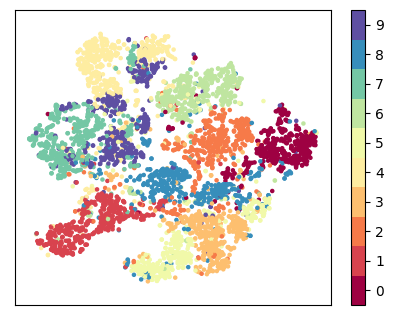

In [7]:
make_t_sne(experiment6_embedding, labels_train, "")

## Prediction

We want to examine how the different representations perform when used as training data to train a mode. We set aside 25% of the data for evaluating

In [8]:
X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(subset_flattened, 
                                                                        labels_train,
                                                                        test_size=0.25,
                                                                        random_state=0)

X_train, X_test, y_train, y_test = train_test_split(data_train, 
                                                    labels_train,
                                                    test_size=0.25,
                                                    random_state=0)

### Logistic Logistic multinomial regression (softmax regression)

We utilize scikit's LogisticRegression class as our model. Mostly default values are used, and parameters are the same. 

* fit_intercept: True
* multi_class: 'multinomial'
* penalty: 'l2'
* solver: 'saga'
* max_iter: 1000
* verbose=2
* n_jobs 8
* tol= [0.01, 0.005, 0.001, 0.0005, 0.0001]

In [13]:
import seaborn as sns
#from cnn_pred import trainSVMestimate, trainLRestimate

tols = [0.01, 0.005, 0.001, 0.0005, 0.0001]
Cs = [0.1, 1., 10., 50., 100., 500.]

### Baseline

We first obtain test scores for raw mnist- images passed to the model as training data.

In [90]:
baseline_lr_clfs = trainLRestimate(X_train_flat, y_train_flat, tols)

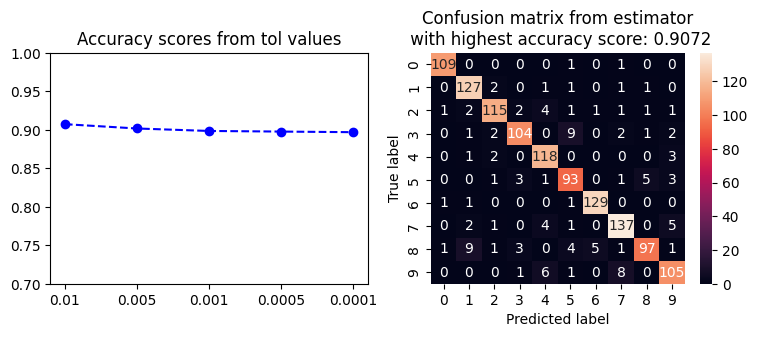

In [103]:
eval_clfs(baseline_lr_clfs, X_test_flat, y_test_flat, tols)
[0.9072, 0.9008, 0.8952, 0.8928, 0.8971]

### Using Experiment 1

We utulize experiment to transform the images in the training fold and train our estimator on those representations. We then evaluate on accuracy. Logistic regression model is still used with the same parameters (varying tol).

In [93]:
exp1_transformed_X_train = experiment1(X_train)
exp1_transformed_X_test = experiment1(X_test)
exp_1_lr_clfs = trainLRestimate(exp1_transformed_X_train, y_train, tols)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


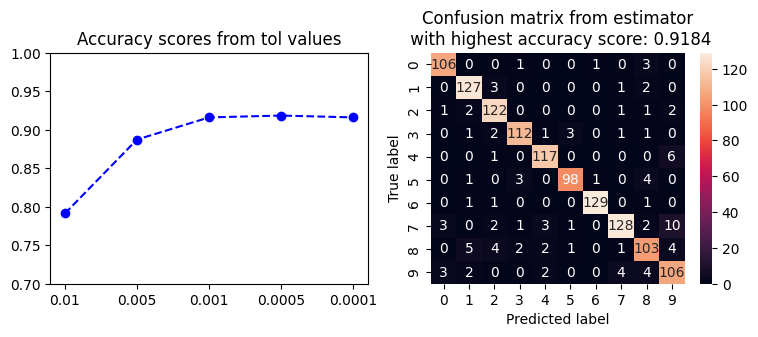

In [104]:
eval_clfs(exp_1_lr_clfs, exp1_transformed_X_test, y_test, tols)
[0.7821, 0.8847, 0.9274, 0.9291, 0.9241]

### Using Experiment 2

In [83]:
exp2_transformed_X_train = experiment2(X_train)
exp2_transformed_X_test = experiment2(X_test)
exp_2_lr_clfs = trainLRestimate(exp2_transformed_X_train, y_train, tols)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


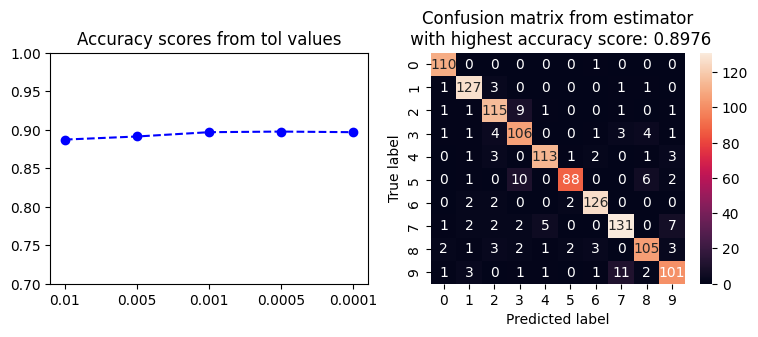

In [84]:
eval_clfs(exp_2_lr_clfs, exp2_transformed_X_test, y_test, tols)
[0.8755, 0.8891, 0.9111, 0.9144, 0.9143]

### Using Experiment 3

In [85]:
exp3_transformed_X_train = experiment3(X_train)
exp3_transformed_X_test = experiment3(X_test)
exp_3_lr_clfs = trainLRestimate(exp3_transformed_X_train, y_train, tols)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


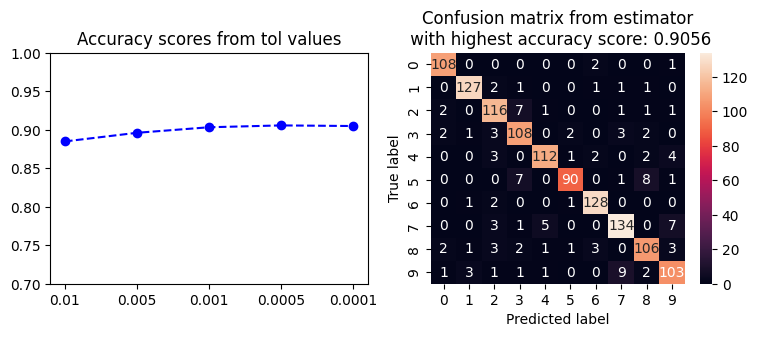

In [86]:
eval_clfs(exp_3_lr_clfs, exp3_transformed_X_test, y_test, tols)

### Using Experiment 4

In [87]:
exp4_transformed_X_train = experiment4(X_train)
exp4_transformed_X_test = experiment4(X_test)
exp_4_lr_clfs = trainLRestimate(exp4_transformed_X_train, y_train, tols)

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


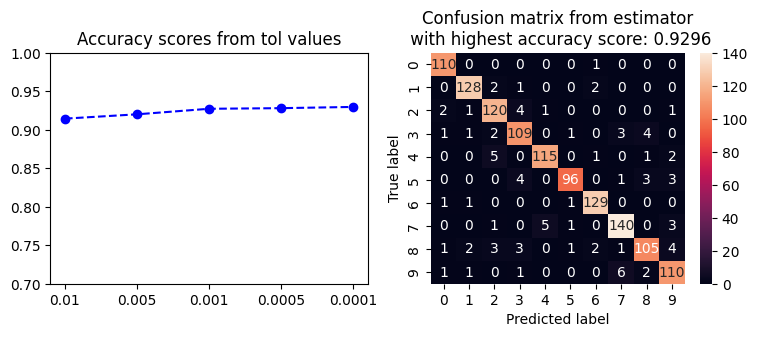

In [88]:
eval_clfs(exp_4_lr_clfs, exp4_transformed_X_test, y_test, tols)
[0.9127, 0.9249, 0.9377, 0.9384, 0.9389]

### Using Experiment 5

In [11]:
exp5_transformed_X_train = experiment4(X_train, length=4)
exp5_transformed_X_test = experiment4(X_test, length=4)
exp_5_lr_clfs = trainLRestimate(exp5_transformed_X_train, y_train, tols)

In [17]:
from sklearn.metrics import confusion_matrix
def eval_clfs(clfs, X_te, y_te, tols):
    clf_scores = [clf.score(X_te, y_te) for clf in clfs]
    max_score = np.max(clf_scores)
    y_pred = clfs[np.argmax(clf_scores)].predict(X_te)
    cf_matrix = confusion_matrix(y_te, y_pred)
    _, ax = plt.subplots(1, 2, figsize=(9, 3))
    ax[0].plot([str(t) for t in tols], clf_scores, linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[0].set_title("Accuracy scores from tol values")
    ax[0].set_ylim([.7, 1.])
    ax[1].set_xlabel("Score")
    ax[1].set_ylabel("tol")
    sns.heatmap(cf_matrix, annot=True, fmt="d", ax=ax[1])
    ax[1].set_xlabel("Predicted label")
    ax[1].set_ylabel("True label")
    ax[1].set_title(f"Confusion matrix from estimator\n with highest accuracy score: {max_score}")
    plt.show()

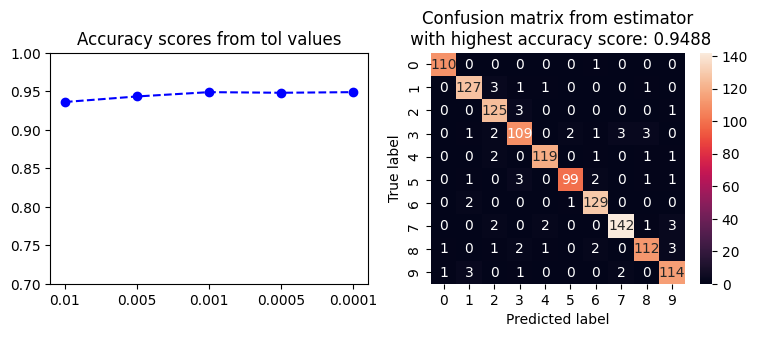

In [18]:
eval_clfs(exp_5_lr_clfs, exp5_transformed_X_test, y_test, tols)

### Using Experiment 6

In [20]:
exp6_transformed_X_train = experiment6(X_train, threshhold=0.85)
exp6_transformed_X_test = experiment6(X_test, threshhold=0.85)
exp_6_lr_clfs = trainLRestimate(exp6_transformed_X_train, y_train, tols)

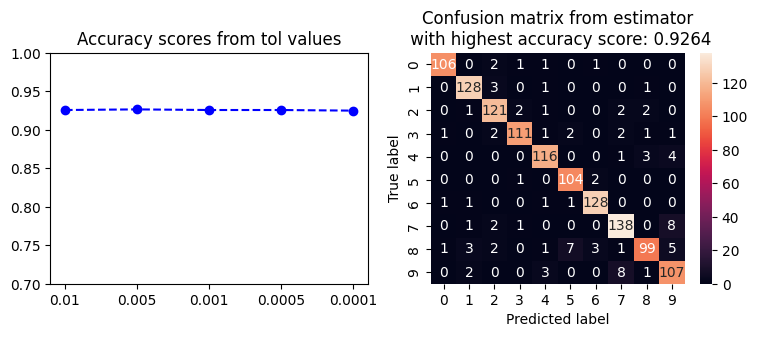

In [22]:
eval_clfs(exp_6_lr_clfs, exp6_transformed_X_test, y_test, tols)

In [8]:
lr_baseline_res = [0.9072, 0.9008, 0.8952, 0.8928, 0.8971]
lr_exp1_res = [0.7821, 0.8847, 0.9274, 0.9291, 0.9241]
lr_exp2_res = [0.8755, 0.8891, 0.9111, 0.9144, 0.9143]
lr_exp4_res = [0.9127, 0.9249, 0.9377, 0.9384, 0.9389]
lr_exp6_res = [0.9298, 0.9299, 0.9289, 0.9287, 0.9285]
lr_exp7_res = [0.8821, 0.9332, 0.9322, 0.9329, 0.9327]
lr_exp8_res = [0.9341, 0.9389, 0.9321, 0.9322, 0.9311]

## SVM as estimator

### Baseline

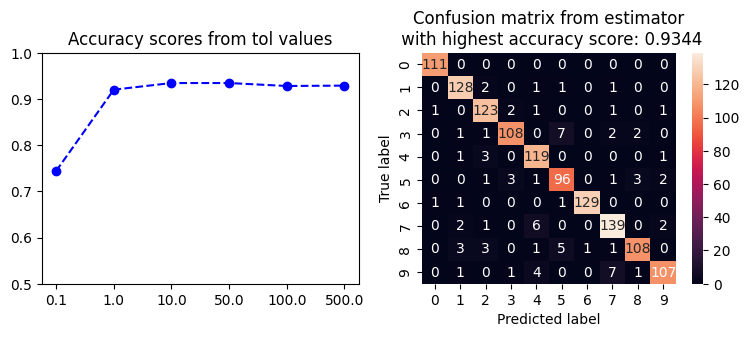

In [111]:
baseline_svm_clfs = trainSVMestimate(X_train_flat, y_train_flat, Cs)
eval_clfs_svm(baseline_svm_clfs, X_test_flat, y_test_flat)
[0.7194, 0.9191, 0.80936, 0.9094, 0.9099]

### Experiment 1 

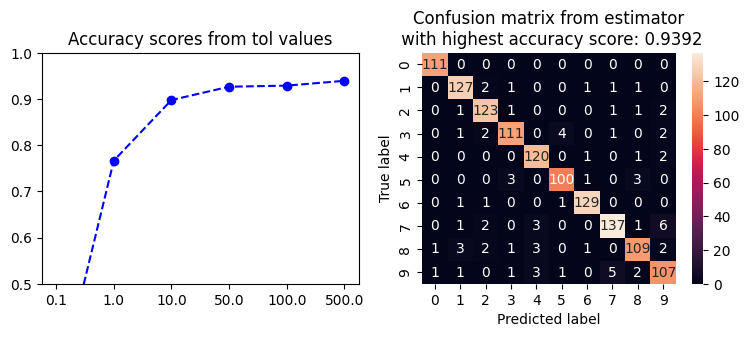

In [113]:
exp_1_svm_clfs = trainSVMestimate(exp1_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_1_svm_clfs, exp1_transformed_X_test, y_test, Cs)

[0.2821, 0.7847, 0.9174, 0.9241, 0.9231, 0.9299]

### Experiment 2

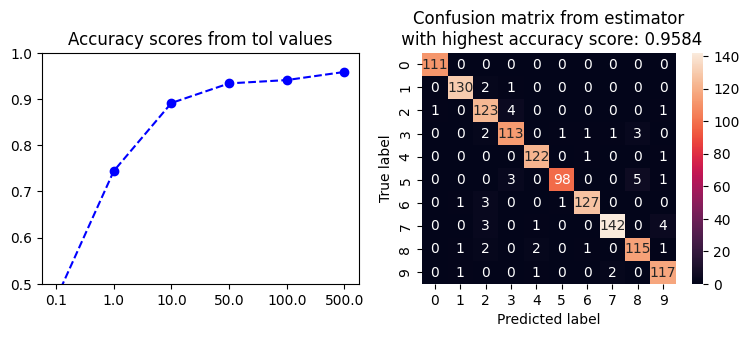

In [114]:
exp_2_svm_clfs = trainSVMestimate(exp2_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_2_svm_clfs, exp2_transformed_X_test, y_test, Cs)
[0.2745, 0.7472, 0.9011, 0.9184, 0.9293, 0.9498]

### Experiment 3

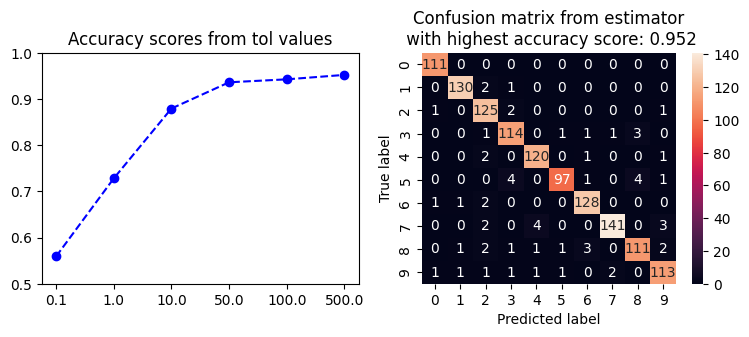

In [115]:
exp_3_svm_clfs = trainSVMestimate(exp3_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_3_svm_clfs, exp3_transformed_X_test, y_test, Cs)

### Experiment 4

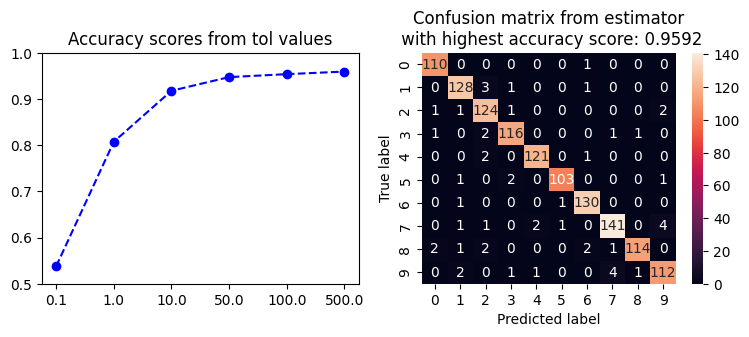

In [116]:
exp_4_svm_clfs = trainSVMestimate(exp4_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_4_svm_clfs, exp4_transformed_X_test, y_test, Cs)

[0.52, 0.8081, 0.9131, 0.9548, 0.9601, 9688]

### Experiment 5

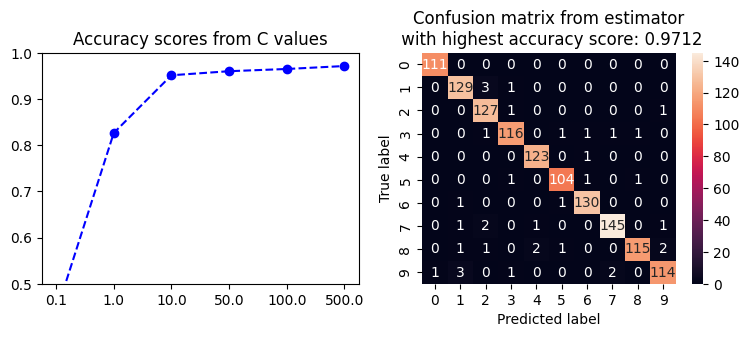

In [25]:
exp_5_svm_clfs = trainSVMestimate(exp5_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_5_svm_clfs, exp5_transformed_X_test, y_test, Cs)

### Experiment 6

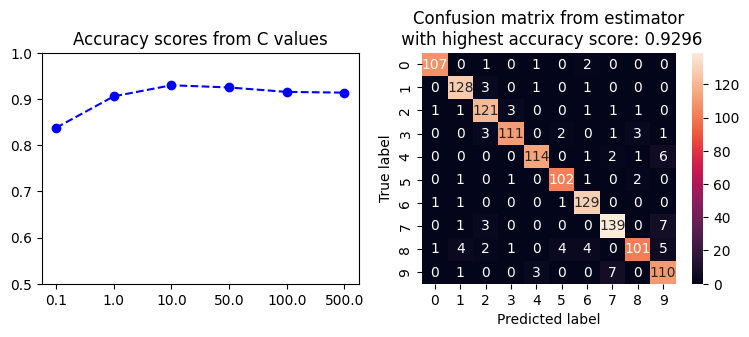

In [26]:
exp_6_svm_clfs = trainSVMestimate(exp6_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_6_svm_clfs, exp6_transformed_X_test, y_test, Cs)
[0.8295, 0.9079, 0.9204, 0.9171, 0.9064, 0.905]

In [ ]:
def load_coefficients(path: str, exp: str):
    folder = f"coefficients/{path}"
    file = np.load(f"{folder}/{exp}.npy")
    return file

lr_best_tols = {
    "baseline": 0.01,
    "exp1": 0.001,
    "exp2": 0.001,
    "exp4": 0.0005,
    "exp6": 0.005,
    "exp7": 0.005,
    "exp8": 0.005
}

In [ ]:
exp7_transformed_X_train = load_coefficients("train", "experiment_7_train")
exp7_transformed_X_test = experiment7(X_test)
exp_7_svm_clfs = trainSVMestimate(exp6_transformed_X_train, y_train, Cs)
eval_clfs_svm(exp_6_svm_clfs, exp6_transformed_X_test, y_test, Cs)

In [23]:
svm_baseline_res = [0.7194, 0.9191, 0.9036, 0.9094, 0.9099, 0.90]
svm_exp1_res = [0.2821, 0.7847, 0.9174, 0.9241, 0.9231, 0.9299]
svm_exp2_res = [0.2745, 0.7472, 0.9011, 0.9184, 0.9293, 0.9498]
svm_exp4_res = [0.52, 0.8081, 0.9131, 0.9548, 0.9601, 0.9688]
svm_exp6_res = [0.8295, 0.9079, 0.9204, 0.9171, 0.9064, 0.905]
svm_exp7_res = [0.8821, 0.9017, 0.9322, 0.9269, 0.9221, 0.9205]
svm_exp8_res = [0.857, 0.956, 0.9421, 0.9372, 0.9311, 0.9301]

lr_baseline_res = [0.9072, 0.9008, 0.8952, 0.8928, 0.8971]
lr_exp1_res = [0.7821, 0.8847, 0.9274, 0.9291, 0.9241]
lr_exp2_res = [0.8755, 0.8891, 0.9111, 0.9144, 0.9143]
lr_exp4_res = [0.9127, 0.9249, 0.9377, 0.9384, 0.9389]
lr_exp6_res = [0.9298, 0.9299, 0.9289, 0.9287, 0.9285]
lr_exp7_res = [0.8821, 0.9332, 0.9322, 0.9329, 0.9327]
lr_exp8_res = [0.9341, 0.9389, 0.9321, 0.9322, 0.9311]


Text(0.5, 0, '$\\gamma$')

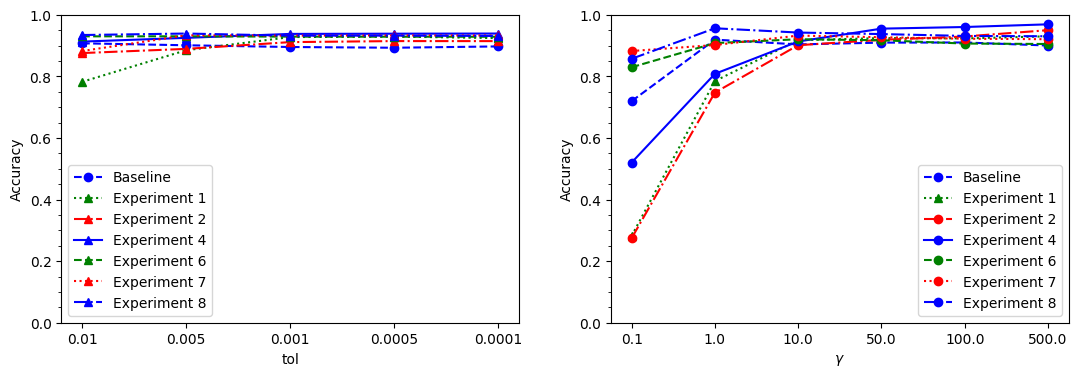

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].plot([str(t) for t in tols], lr_baseline_res, linestyle='--', marker='^', color='b', label='Baseline')
ax[0].plot([str(t) for t in tols], lr_exp1_res, linestyle=':', marker='^', color='g', label='Experiment 1')
ax[0].plot([str(t) for t in tols], lr_exp2_res, linestyle='-.', marker='s', color='r', label='Experiment 2')
ax[0].plot([str(t) for t in tols], lr_exp4_res, linestyle='-', marker='s', color='b', label='Experiment 4')
ax[0].plot([str(t) for t in tols], lr_exp6_res, linestyle='--', marker='o', color='g', label='Experiment 6')
ax[0].plot([str(t) for t in tols], lr_exp7_res, linestyle=':', marker='o', color='r', label='Experiment 7')
ax[0].plot([str(t) for t in tols], lr_exp8_res, linestyle='-.', marker='*', color='b', label='Experiment 8')
ax[0].legend()
ax[0].minorticks_on()
ax[0].xaxis.set_tick_params(which='minor', bottom=False)
ax[0].set_ylim([.0, 1.])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("tol")
ax[1].plot([str(t) for t in Cs], svm_baseline_res, linestyle='--', marker='^', color='b', label='Baseline')
ax[1].plot([str(t) for t in Cs], svm_exp1_res, linestyle=':', marker='^', color='g', label='Experiment 1')
ax[1].plot([str(t) for t in Cs], svm_exp2_res, linestyle='-.', marker='s', color='r', label='Experiment 2')
ax[1].plot([str(t) for t in Cs], svm_exp4_res, linestyle='-', marker='s', color='b', label='Experiment 4')
ax[1].plot([str(t) for t in Cs], svm_exp6_res, linestyle='--', marker='o', color='g', label='Experiment 6')
ax[1].plot([str(t) for t in Cs], svm_exp7_res, linestyle=':', marker='o', color='r', label='Experiment 7')
ax[1].plot([str(t) for t in Cs], svm_exp8_res, linestyle='-.', marker='*', color='b', label='Experiment 8')
ax[1].legend()
ax[1].minorticks_on()
ax[1].xaxis.set_tick_params(which='minor', bottom=False)
ax[1].set_ylim([.0, 1.])
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("C")